In [11]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pickle

%matplotlib inline


In [2]:
img = cv2.imread('camera_cal/calibration1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

True


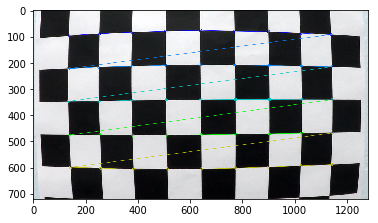

In [3]:
ret, corners = cv2.findChessboardCorners(gray, (9,5), None)
print(ret)
img_corners = cv2.drawChessboardCorners(img, (9,5), corners, ret)
plt.imshow(img_corners)


In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

images = glob.glob('camera_cal/calibration*.jpg')

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    if ret == True:
        print(fname)
        objpoints.append(objp)
        imgpoints.append(corners)


camera_cal/calibration6.jpg
camera_cal/calibration7.jpg
camera_cal/calibration3.jpg
camera_cal/calibration2.jpg
camera_cal/calibration20.jpg
camera_cal/calibration19.jpg
camera_cal/calibration18.jpg
camera_cal/calibration15.jpg
camera_cal/calibration14.jpg
camera_cal/calibration16.jpg
camera_cal/calibration17.jpg
camera_cal/calibration13.jpg
camera_cal/calibration12.jpg
camera_cal/calibration10.jpg
camera_cal/calibration11.jpg
camera_cal/calibration9.jpg
camera_cal/calibration8.jpg


In [12]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

In [13]:
with open('distortion_values.pickle', 'wb') as f:
    pickle.dump((ret, mtx, dist, rvecs, tvecs), f)

In [14]:
with open('distortion_values.pickle', 'rb') as f:
    ret, mtx, dist, rvecs, tvecs = pickle.load(f)

In [15]:
img1 = cv2.imread('camera_cal/calibration1.jpg')
dst1 = cv2.undistort(img1, mtx, dist, None, mtx)

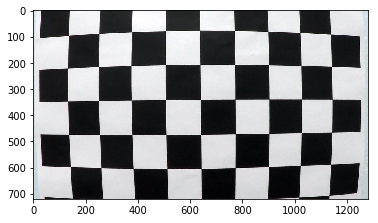

In [16]:
plt.imshow(img1)

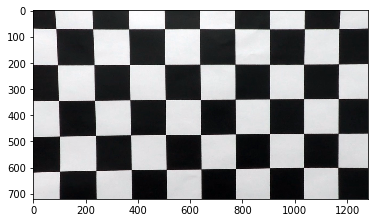

In [8]:
plt.imshow(dst1)

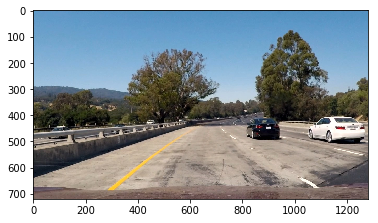

In [9]:
test1 = plt.imread('test_images/test1.jpg')
test1_undistorted = cv2.undistort(test1, mtx, dist, None, mtx)
plt.imshow(test1)

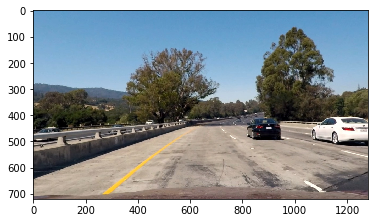

In [10]:
plt.imshow(test1_undistorted)